# Setup

In [1]:
import numpy as np
from numpy import random
import pickle
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from time import time

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Dataset Load

In [5]:
DATASET = 'amazon'

PATH_DATASET = '/Users/rafalencar/Documents/Datasets/Products_Catalog/'

In [8]:
dataset = pd.read_csv(PATH_DATASET + 'amazon_co-ecommerce_sample_Dataset.csv')
dataset = dataset.replace(np.nan, '', regex=True)
print("Dataset Shape:", dataset.shape)

Dataset Shape: (9310, 5)


In [9]:
CATEGORY = "amazon_category_and_sub_category"

labels = dataset[CATEGORY].unique()
LABELS = labels.shape[0]
print("Total Labels : ", labels.shape[0])

Total Labels :  255


In [22]:
dataTrain, dataTest = train_test_split(dataset, test_size=0.1)
y_train = dataTrain[CATEGORY]
y_test  = dataTest[CATEGORY]
print("Trainset Size:", dataTrain.shape[0])
print("Testset Size:", dataTest.shape[0])

Trainset Size: 8379
Testset Size: 931


In [23]:
labelsTrain = dataTrain[CATEGORY].unique()
print("Trainset Labels : ", labelsTrain.shape[0])
labelsTest  = dataTest[CATEGORY].unique()
print("Testset Labels : ", labelsTest.shape[0])

Trainset Labels :  250
Testset Labels :  116


# Embedding

### Paths and Constants

In [51]:
X_used = 'product_name'
    
X_data     = dataset[X_used]
dataTrainX = dataTrain[X_used]
dataTestX  = dataTest[X_used]

X_size = []
for item in X_data:
        split = item.split()
        X_size.append(len(split))     
MAX_SEQUENCE_LENGTH = int(1.5*max(X_size))

In [52]:
EMBEDDING_DIM = 100

PATH_DATA_MODELS = 'data_models/'
FILE_VECTORIZER  = PATH_DATA_MODELS + DATASET + '_' + X_used + '_vectorizer.sav'

### Vectorizer

In [53]:
vectorizer  = pickle.load(open(FILE_VECTORIZER, 'rb'))
tfidf_train = pd.DataFrame(vectorizer.transform(dataTrainX).toarray())
tfidf_test  = pd.DataFrame(vectorizer.transform(dataTestX).toarray())

# Train Model

In [54]:
start = time() 
model = MultinomialNB(alpha=0.005).fit(tfidf_train, y_train)
print('Train time:', round(time() - start, 2), 's')

Train time: 2.44 s


# Evaluate

### Metrics

In [55]:
y_pred = model.predict(tfidf_test)

In [56]:
acc_train = round(100 * model.score(tfidf_train, y_train), 1)
acc_test  = round(100 * model.score(tfidf_test, y_test), 1)

print('Score Train: ', acc_train, '%')
print('Score Test:  ', acc_test, '%')

Score Train:  97.5 %
Score Test:   67.0 %


### Classification Report

**Precision** is percentage of samples correctly predicted to that category<br>
P = tp / (tp + fp), tp = true positive, fp = false positive <br><br>

**Recall** is percentage of samples of that category predicted correctly<br>
R    = tp / (tp + fn), tp = true positive, fn = false Negative <br><br>

In [57]:
class_report = metrics.classification_report(y_test, y_pred)
split = class_report.split('\n') 
for i, line in enumerate(split):
    s = line.split()
    if len(s) > 0:
        support   = s[-1]
        s.pop()
        f1_score  = s[-1]
        s.pop()
        recall    = s[-1]
        s.pop()
        precision = s[-1]
        s.pop()
        if len(s) <= 0:
            label = 'label'
        else:
            label = ' '.join(s)
        split[i] = [label, precision, recall, f1_score, support]
    else: 
        split[i] = ['']

/anaconda2/envs/CnnEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/envs/CnnEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [59]:
df = pd.DataFrame(split)
df.columns = df.loc[0]
df = df.drop([0])
df = df.dropna()

print('Classification Report')
df

Classification Report


,label,precision,recall,f1-score,support
2,Arts & Crafts > Art Sand,0.00,0.00,0.00,2
3,Arts & Crafts > Blackboards,1.00,0.75,0.86,4
4,Arts & Crafts > Children's Craft Kits,0.12,0.25,0.17,4
5,Arts & Crafts > Children's Craft Kits > Bead A...,0.93,0.85,0.89,33
6,Arts & Crafts > Colouring Pencils,0.80,0.67,0.73,6
7,Arts & Crafts > Colouring Pens & Markers,1.00,0.29,0.44,7
8,Arts & Crafts > Painting By Numbers,1.00,1.00,1.00,1
9,Arts & Crafts > Paper & Stickers,0.71,0.57,0.63,21
10,Baby & Toddler Toys > Pushchair Toys,1.00,1.00,1.00,1
11,Baby & Toddler Toys > Rocking Horses,0.00,0.00,0.00,1


### Confusion Matrix

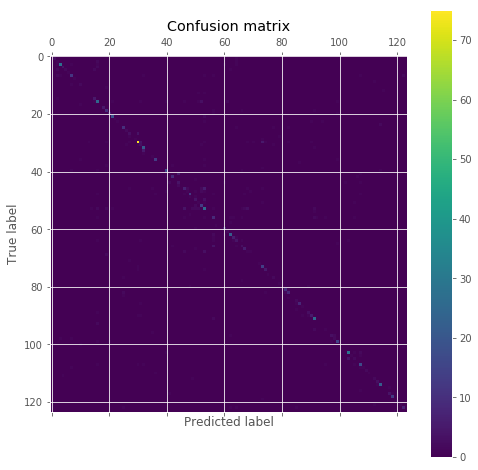

In [60]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.matshow(cm)
plt.colorbar()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.gcf().set_size_inches(8, 8)
plt.show()

# Save and Load Model

### Save

In [ ]:
PATH_MODELS = 'models/'
FILE_MODEL  = PATH_MODELS + 'rihappy_model_mnb.sav'

In [ ]:
pickle.dump(model, open(FILE_MODEL, 'wb'))

### Load

In [ ]:
PATH_MODELS = 'models/'
FILE_MODEL  = PATH_MODELS + 'rihappy_model_mnb.sav'

In [ ]:
model = pickle.load(open(FILE_MODEL, 'rb'))